This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?urlpath=lab/tree/notebooks/6_clustering/)

# Iris data : KMEANS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans


iris = datasets.load_iris()
x=iris.data

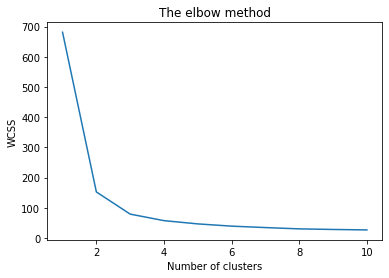

In [3]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


## Exercize 
- 'The elbow method' from the above graph :  find the optimum number of clusters  by observing  the within cluster sum of squares (WCSS) 
- Explain why the curve doesn't decrease significantly with every iteration.

In [6]:
#Applying kmeans to the dataset / Creating the kmeans classifier

NbClust= 3 
kmeans = KMeans(n_clusters = NbClust, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

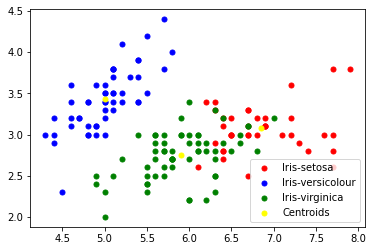

In [7]:

#Visualising the  3 first clusters wrt x1 X2
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 25, c = 'red', label = 'C0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'C1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 1, 1], s = 25, c = 'gren', label = 'C2')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s =25, c = 'yellow', label = 'Centroids')
plt.legend()

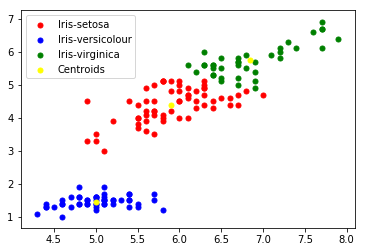

In [5]:
#Visualising the clusters x1, x3
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 2], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 2], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2], s = 25, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s = 25, c = 'yellow', label = 'Centroids')

plt.legend();